# Chomsky normal form
## Converting trees in a treebank to CNF

[Assignment](http://stp.lingfil.uu.se/~sara/kurser/parsing18/pcfg_parsing.html)

## Tree representation

To have more control over tree transformation and additional features like loading, saving and visualizing them, trees are represented by their own class.

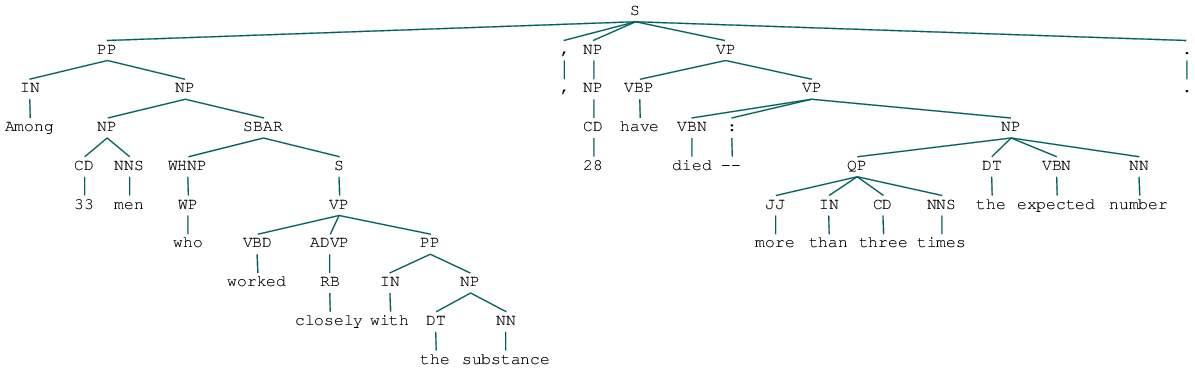

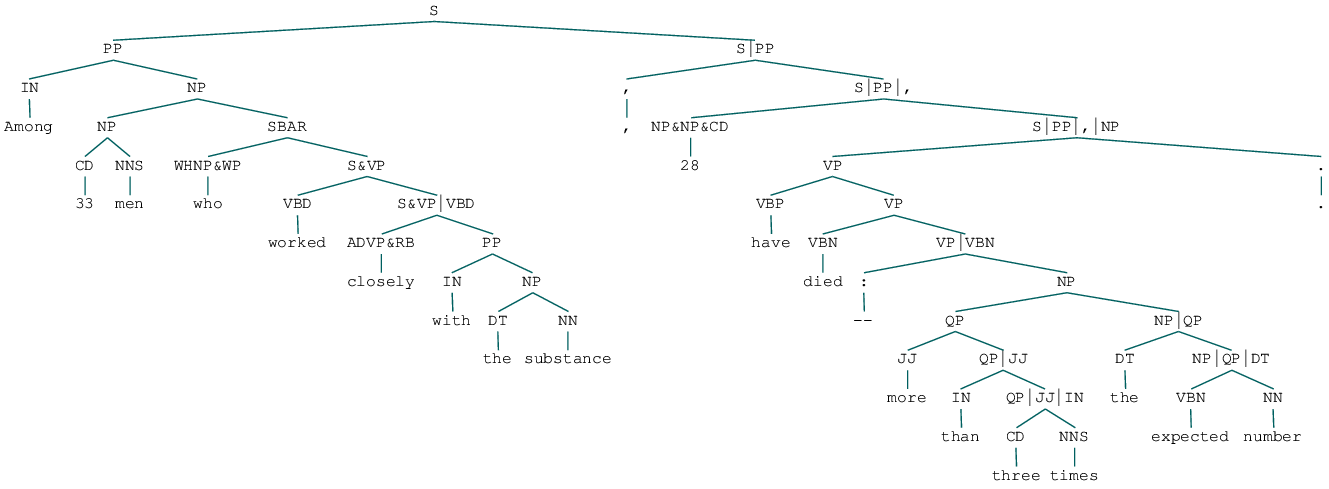

["S", ["PP", ["IN", "Among"], ["NP", ["NP", ["CD", "33"], ["NNS", "men"]], ["SBAR", ["WHNP&WP", "who"], ["S&VP", ["VBD", "worked"], ["S&VP|VBD", ["ADVP&RB", "closely"], ["PP", ["IN", "with"], ["NP", ["DT", "the"], ["NN", "substance"]]]]]]]], ["S|PP", [",", ","], ["S|PP|,", ["NP&NP&CD", "28"], ["S|PP|,|NP", ["VP", ["VBP", "have"], ["VP", ["VBN", "died"], ["VP|VBN", [":", "--"], ["NP", ["QP", ["JJ", "more"], ["QP|JJ", ["IN", "than"], ["QP|JJ|IN", ["CD", "three"], ["NNS", "times"]]]], ["NP|QP", ["DT", "the"], ["NP|QP|DT", ["VBN", "expected"], ["NN", "number"]]]]]]], [".", "."]]]]]


In [69]:
import json
import nltk.tree
import IPython.display

class Tree(object):
    
    def __init__(self, structure: list=None, text: str=None):
        if text:
            self.load(text)
        else:
            self.structure = structure if structure is not None else []
            
    def load(self, text: str):
        self.structure = json.loads(text)
        
    def save(self) -> str:
        return json.dumps(self.structure)
    
    def visualize(self):
        IPython.display.display(self.to_nltk_tree())
        
    def to_nltk_tree(self) -> nltk.tree.Tree:
        as_str = self.save()
        # Transform the string representation of the tree
        # to the string representation of an NLTK tree 
        as_str = as_str.replace("[", "(").replace("]", ")")
        as_str = as_str.replace(', ', " ").replace('"', "")
        return nltk.tree.Tree.fromstring(as_str)
    
    def __repr__(self) -> str:
        return self.save()
    
    def is_cnf(self, tree=None) -> bool:
        """
        Returns true, if the tree is in CNF.
        Adapted from starter code.
        """
        if tree is None:
            tree = self.structure
        n = len(tree)
        if n == 2:
            return isinstance(tree[1], str)
        elif n == 3:
            return self.is_cnf(tree[1]) and self.is_cnf(tree[2])
        else:
            return False
    
    def to_cnf(self) -> list:
        structure = self.structure
            
        if (type(structure) is str or 
                (len(structure) == 2 and type(structure[1]) is str)): 
            # Base case: Root symbol like "NP" or leaves
            return structure
        
        while len(structure) == 2 and type(structure[1]) is list:
            # Remove unary rules
            new_node = f"{structure[0]}&{structure[1][0]}"
            structure = [new_node] + structure[1][1:]
            
        if len(structure) > 3:
            # Binarize
            part_one = structure[:2]
            part_two = structure[2:]
            new_node = f"{part_one[0]}|{part_one[1][0]}"
            structure = part_one + [[new_node] + part_two]
        
        # Recursion: Convert all subtrees to CNF
        structure = [Tree(l).to_cnf() for l in structure]
        
        # TODO remove assert
        assert Tree(structure).is_cnf()
        return structure
        
t = '["S", ["PP", ["IN", "Among"], ["NP", ["NP", ["CD", "33"], ["NNS", "men"]], ["SBAR", ["WHNP", ["WP", "who"]], ["S", ["VP", ["VBD", "worked"], ["ADVP", ["RB", "closely"]], ["PP", ["IN", "with"], ["NP", ["DT", "the"], ["NN", "substance"]]]]]]]], [",", ","], ["NP", ["NP", ["CD", "28"]]], ["VP", ["VBP", "have"], ["VP", ["VBN", "died"], [":", "--"], ["NP", ["QP", ["JJ", "more"], ["IN", "than"], ["CD", "three"], ["NNS", "times"]], ["DT", "the"], ["VBN", "expected"], ["NN", "number"]]]], [".", "."]]'
tree = Tree(text=t)
tree.visualize()
j = Tree(tree.to_cnf())
j.visualize()
print(j.save())

## Convert a treebank to CNF

In [75]:
treebank_file = "./master_files/dev.dat"
cnf_treebank_file = "./master_files/dev.cnf"

with open(cnf_treebank_file, "w") as out:
    for line in open(treebank_file):
        t = Tree(text=line.strip())
        out.write(Tree(t.to_cnf()).save() + "\n")